## 1. Loading and Understanding the Phishing Websites' dataset

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
tf.random.set_random_seed(9)

In [6]:
phishing_sites = pd.read_csv('Phishing.csv')

In [10]:
phishing_sites.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11045,11046,11047,11048,11049,11050,11051,11052,11053,11054
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,-1
URL_Length,1,1,0,0,0,0,0,0,0,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,-1,1,-1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,1,1,1,1,-1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,1,1
Favicon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,1


In [11]:
phishing_sites.shape

(11055, 31)

In [12]:
phishing_sites.Result.unique()

array([-1,  1], dtype=int64)

In [15]:
phishing_sites.Result.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

## 2. Further data investigation and preparing investigation reports

In [16]:
import matplotlib.pyplot as plt

In [61]:
distribution = phishing_sites.Result.value_counts()

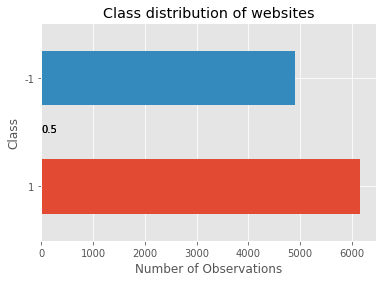

In [80]:
plt.style.use('ggplot')
ax = distribution.plot.barh(title = 'Class distribution of websites')
ax.set(ylabel = "Class", xlabel = "Number of Observations")

In [22]:
phishing_sites.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [23]:
phishing_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

## 3. Getting useful information from the dataset